In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring and cleaning the data

In [2]:
coffee_df = pd.read_csv("simplified_coffee.csv")

In [3]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


In [4]:
# isolating all the numericals and storing them
numericals = coffee_df.select_dtypes(include='number')

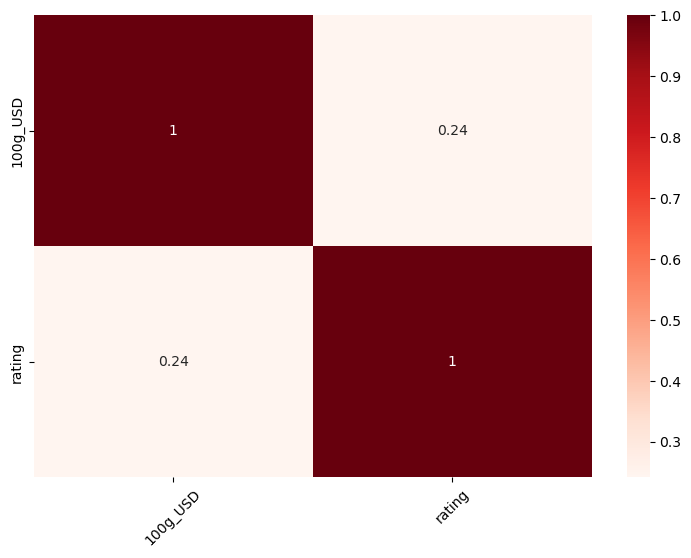

In [5]:
# checking for correlation between numerical features
heatmap = plt.figure(figsize=(9,6))
sns.heatmap(numericals.corr(), cmap='Reds', annot=True)
plt.xticks(rotation=45)
plt.show()

In [6]:
# extracting the rows of the df that contain NaN's
coffee_df_na = coffee_df[coffee_df.isna().any(axis=1)]

In [7]:
# showing the rows of the df that contain NaN's
coffee_df_na

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
132,Esmeralda Estate Panama Geisha,Difference Coffee,NaN,England,Panama,111.11,94,August 2018,Evaluated as espresso produced as a ristretto ...
480,Esmeralda Estate Panama Geisha,Difference Coffee,NaN,England,Panama,111.11,94,June 2020,Evaluated as espresso produced as a ristretto ...
481,Asfaw Maru Ethiopia Natural Cold Brew,Collage Coffee,NaN,United States,Ethiopia,1.32,93,July 2020,"A ready-to-drink black coffee, tested cold. Rh..."
482,Ethiopia Nano Challa Cold Brew,Bonfire Coffee Company,NaN,United States,Ethiopia,1.34,94,July 2020,"A ready-to-drink black coffee, tested cold. Ri..."
483,Brazil Ipanema Black Edition A-41 Red Cherry,GK Coffee,NaN,Taiwan,Brazil,4.27,94,July 2020,"A ready-to-drink black coffee, tested cold. Bi..."
606,Esmeralda Estate Panama Geisha,Difference Coffee,NaN,England,Panama,100.00,94,November 2020,Evaluated as espresso produced as a “ristretto...
822,Brazil Ipanema Golden Edition C26 Lychee,GK Coffee,NaN,Taiwan,Brazil,4.00,94,July 2021,"A ready-to-drink black coffee, tested cold. Dr..."
826,Esmeralda Estate Panama Geisha,Difference Coffee,NaN,England,Panama,111.11,94,August 2021,Evaluated as espresso produced as a “ristretto...
882,Ethiopia Guji Hambela Wate 74110/74112/74158 M...,Taster's Coffee,NaN,Taiwan,Ethiopia,3.17,93,September 2021,Evaluated as espresso produced as a “ristretto...
886,Yemen Lot 106,Port of Mokha,NaN,United States,Yemen,39.68,96,October 2021,"Deep yet soaring, vertically complex. Dried bl..."


In [8]:
# replacing the NaN's with "Undetermined"
coffee_df["roast"].fillna("Undetermined", inplace=True)

In [9]:
# check whether the NaN's were actually replaced using an index from above
coffee_df["roast"][132]

'Undetermined'

In [10]:
# dropping the "review_date" column since this information is not relevant for the analysis
coffee_df.drop(["review_date"], axis=1, inplace=True)

In [11]:
# checking to see whether the column was dropped
coffee_df.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,"High-toned, floral. Dried apricot, magnolia, a..."


In [12]:
# checking the min and max values in the "100g_USD" column
print(coffee_df["100g_USD"].min())
print(coffee_df["100g_USD"].max())
print(coffee_df["100g_USD"].mean())

0.17
132.28
10.479125200642045


In [13]:
# adding columns that give a more tangible description of the different ratings,
# based on the description on how to interpretate reviews: https://www.coffeereview.com/interpret-coffee/

# rating & interpretation
# 95-100: Exceptional
# 90-94: Very Good to Outstanding
# 85-89: Good
# 80-84: Fair
# <80: Poor

coffee_df["rating_cat"] = coffee_df["rating"].apply(lambda x: "Exceptional" if x >= 95
                                                     else ("Very Good to Outstanding" if x >= 90
                                                           else ("Good" if x >= 85
                                                                 else ("Fair" if x >= 80
                                                                       else "Poor" if x < 80 else None))))

In [14]:
# switching the order of the columns
coffee_df = coffee_df[["name", "roaster", "roast", "loc_country", "origin", "100g_USD", "rating", "rating_cat", "review"]]

In [15]:
coffee_df["rating_cat"].value_counts()

Very Good to Outstanding    1003
Exceptional                  231
Good                          11
Fair                           1
Name: rating_cat, dtype: int64

# Preparations for the clustering

In [16]:
# importing relevant libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

In [63]:
# identifying what columns should be part of the clustering exercise:
# "roast" (should be dummified before)
# "origin" (should be dummified)
# "100g_USD" (should be scaled before)
# "rating" (should be dummified before)

In [18]:
# dummifying the "roast" and "origin" column
roast_dummies = pd.get_dummies(coffee_df["roast"])
origin_dummies = pd.get_dummies(coffee_df["origin"])
rating_cat_dummies = pd.get_dummies(coffee_df["rating_cat"])

In [19]:
# concatenating the "100g_USD" and "rating" columns to prep for scaling
price = coffee_df["100g_USD"]

In [20]:
price = price.values.reshape(-1, 1)

In [21]:
# storing the column names
col_names = ["100g_USD_scaled"]

In [22]:
col_names

['100g_USD_scaled']

In [23]:
# scaling the "100g_USD" and "rating" columns
scaler = StandardScaler()
price_scaled = scaler.fit_transform(price)

In [24]:
# transforming the scaled columns into a Pandas dataframe and reassigning the column names
price_scaled = pd.DataFrame(price_scaled, columns=col_names)
price_scaled

,100g_USD_scaled
0,-0.428678
1,-0.466509
2,-0.417552
3,-0.396040
4,-0.482828
...,...
1241,-0.428678
1242,-0.559230
1243,-0.559230
1244,-0.428678


In [25]:
# concatting everything into coffee features used for the clustering
coffee_features = pd.concat([roast_dummies, origin_dummies, rating_cat_dummies, price_scaled],axis=1)

In [26]:
coffee_features

,Dark,Light,Medium,Medium-Dark,Medium-Light,Undetermined,Bolivia,Brazil,Burundi,Colombia,...,Taiwan,Tanzania,Thailand,Uganda,Yemen,Exceptional,Fair,Good,Very Good to Outstanding,100g_USD_scaled
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.428678
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.466509
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.417552
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.396040
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.482828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.428678
1242,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.559230
1243,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.559230
1244,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.428678


# Executing the clustering

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

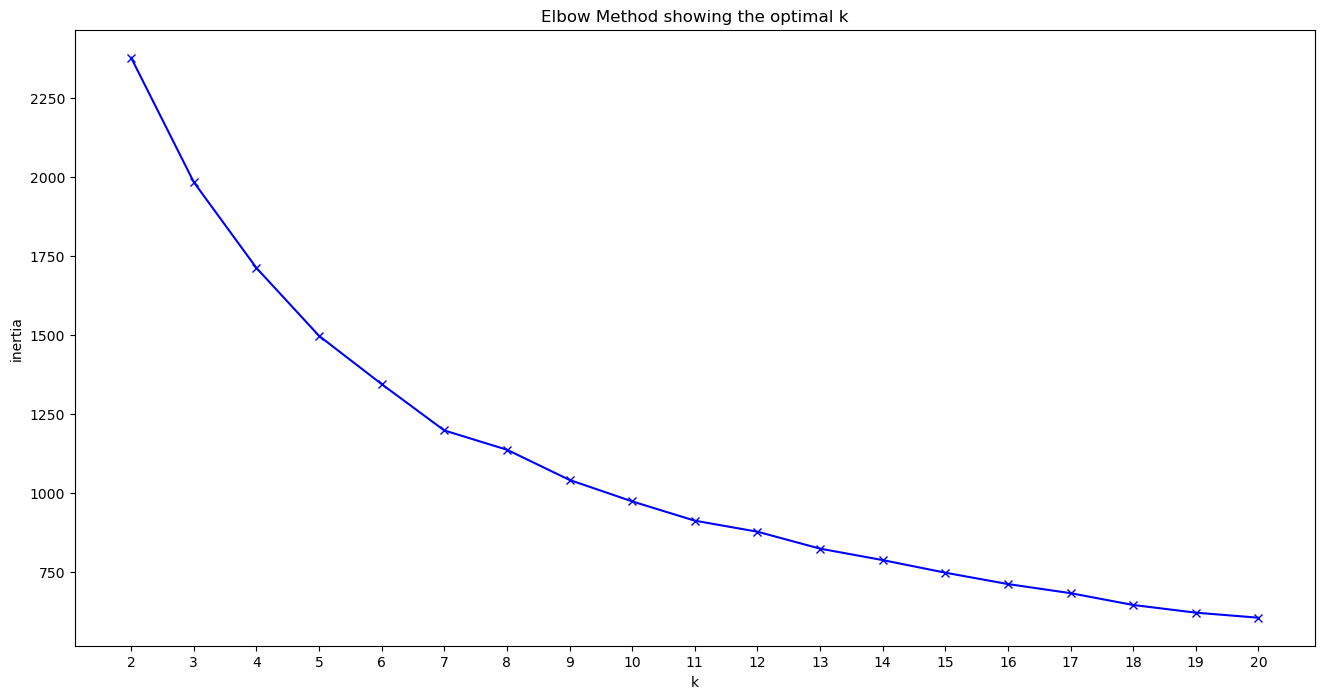

In [27]:
# checking for the optimal amount of clusters
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(coffee_features)
    inertia.append(kmeans.inertia_)

%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

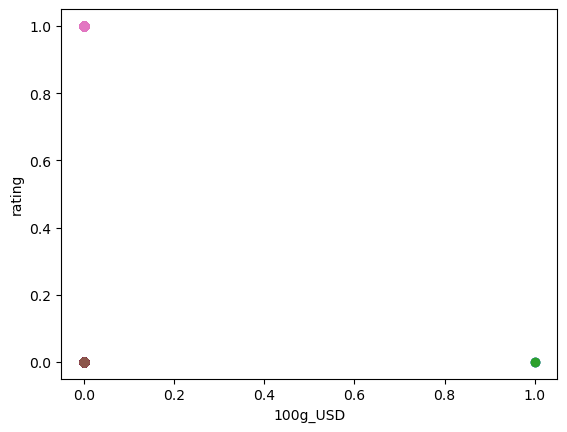

In [28]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(coffee_features)
# assign a cluster to each example
labels = kmeans.predict(coffee_features)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(coffee_features.to_numpy()[row_ix, 0], coffee_features.to_numpy()[row_ix,1])
    pyplot.xlabel("100g_USD")
    pyplot.ylabel("rating")
    # show the plot
pyplot.show()

In [29]:
clusters = kmeans.predict(coffee_features)
# clusters
pd.Series(clusters).value_counts().sort_index()

0    445
1     20
2    101
3    124
4    260
5    116
6    180
dtype: int64

In [30]:
coffee_features["clusters"] = clusters

In [31]:
coffee_features

,Dark,Light,Medium,Medium-Dark,Medium-Light,Undetermined,Bolivia,Brazil,Burundi,Colombia,...,Tanzania,Thailand,Uganda,Yemen,Exceptional,Fair,Good,Very Good to Outstanding,100g_USD_scaled,clusters
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.428678,4
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.466509,4
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.417552,2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.396040,6
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.482828,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.428678,0
1242,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.559230,0
1243,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.559230,0
1244,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.428678,0


In [32]:
# creating a new dataframe that includes all the original values that were used for the clustering, as well as a "cluster" column
clustered_coffee_df = coffee_df
clustered_coffee_df.drop(["roaster", "loc_country", "review"], inplace=True, axis=1)
clustered_coffee_df["clusters"] = clusters
clustered_coffee_df

,name,roast,origin,100g_USD,rating,rating_cat,clusters
0,Ethiopia Shakiso Mormora,Medium-Light,Ethiopia,4.70,92,Very Good to Outstanding,4
1,Ethiopia Suke Quto,Medium-Light,Ethiopia,4.19,92,Very Good to Outstanding,4
2,Ethiopia Gedeb Halo Beriti,Medium,Ethiopia,4.85,94,Very Good to Outstanding,2
3,Ethiopia Kayon Mountain,Light,Ethiopia,5.14,93,Very Good to Outstanding,6
4,Ethiopia Gelgelu Natural Organic,Medium-Light,Ethiopia,3.97,93,Very Good to Outstanding,4
...,...,...,...,...,...,...,...
1241,Finca Patzibir,Medium-Light,Guatemala,4.70,92,Very Good to Outstanding,0
1242,Proyecto Aurora,Medium-Light,Guatemala,2.94,93,Very Good to Outstanding,0
1243,Finca El Potrero,Medium-Light,Guatemala,2.94,93,Very Good to Outstanding,0
1244,Chacayá Santiago Atitlán,Medium-Light,Guatemala,4.70,93,Very Good to Outstanding,0


In [33]:
# save scaler with a pickle
import pickle

# scaler = StandardScaler()
# model = KMeans()

with open("scaler_coffee_recommender.pickle", "wb") as f:
    pickle.dump(scaler,f)
    
with open("kmeans_coffee_recommender.pickle", "wb") as f:
    pickle.dump(kmeans,f)

## Visually inspecting the different clusters

In [34]:
coffee_dict = {}

for count in clustered_coffee_df["clusters"].unique():
    cluster_count = clustered_coffee_df[clustered_coffee_df["clusters"] == count]
    coffee_dict[f"Cluster {count}"] = cluster_count

In [85]:
# this code can be used to check the different results in the different clusters
cluster_check = pd.DataFrame(coffee_dict["Cluster 5"]) # change the number of the cluster to check the results
cluster_check.head(20)

,name,roast,origin,100g_USD,rating,rating_cat,clusters
12,100% Kona SL-28,Medium-Light,Hawai'I,33.05,97,Exceptional,5
28,Panama Elida Green Tip Gesha Natural,Medium-Light,Panama,32.63,94,Very Good to Outstanding,5
29,100% Kona Bourbon Pointu Laurina,Medium-Light,Hawai'I,19.82,95,Exceptional,5
34,Blue Label La Esmeralda Porton Pascua Gesha,Medium-Light,Panama,26.46,95,Exceptional,5
48,Panama Auromar Estate Geisha Peaberry,Medium-Light,Panama,22.49,95,Exceptional,5
50,Panama Finca Hartmann Geisha Natural,Light,Panama,23.81,95,Exceptional,5
69,Kona Mocca®,Medium,Hawai'I,19.82,95,Exceptional,5
75,Finca La Maria Geisha Natural,Medium-Light,Colombia,22.49,95,Exceptional,5
86,Lycello by Ninety Plus,Medium-Light,Panama,33.07,95,Exceptional,5
90,Karen J Red Bourbon,Medium-Light,Hawai'I,20.26,94,Very Good to Outstanding,5


In [86]:
# checking the distribution among the clusters
cluster_check["clusters"].value_counts()

5    116
Name: clusters, dtype: int64